In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

# Data

In [12]:
df = pd.read_csv('SIGP_freight_data.csv',index_col=0, parse_dates=True)
df

,cargo,container
2007-01-31,2828.2,204.7
2007-02-28,2512.5,181.0
2007-03-31,2850.2,202.8
2007-04-30,3027.7,220.1
2007-05-31,3139.4,220.8
...,...,...
2022-10-31,4394.4,419.4
2022-11-30,4529.5,411.0
2022-12-31,4566.1,410.9
2023-01-31,4304.7,380.3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 194 entries, 2007-01-31 to 2023-02-28
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cargo      194 non-null    float64
 1   container  194 non-null    float64
dtypes: float64(2)
memory usage: 4.5 KB


In [177]:
df.index = 

,cargo,container
2007-01-31,2828.2,204.7
2007-02-28,2512.5,181.0
2007-03-31,2850.2,202.8
2007-04-30,3027.7,220.1
2007-05-31,3139.4,220.8
...,...,...
2022-10-31,4394.4,419.4
2022-11-30,4529.5,411.0
2022-12-31,4566.1,410.9
2023-01-31,4304.7,380.3


 # Data Analysis

## visualtization

Text(0.5, 1.0, 'Shanghai_Container')

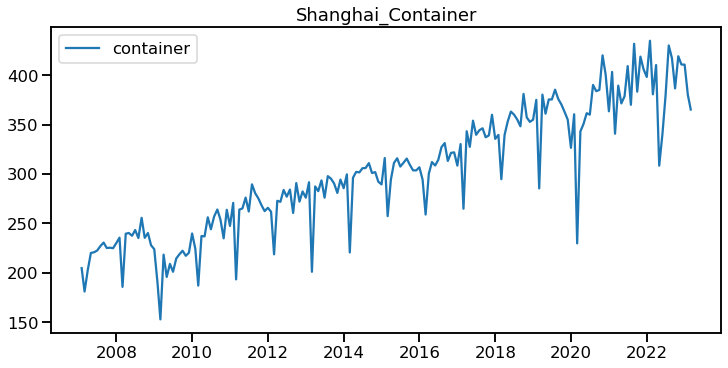

In [16]:
fig,ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(df.index, df['container'],label='container')
ax.legend()
ax.set_title('Shanghai_Container')

Text(0.5, 1.0, 'Shanghai_Cargo')

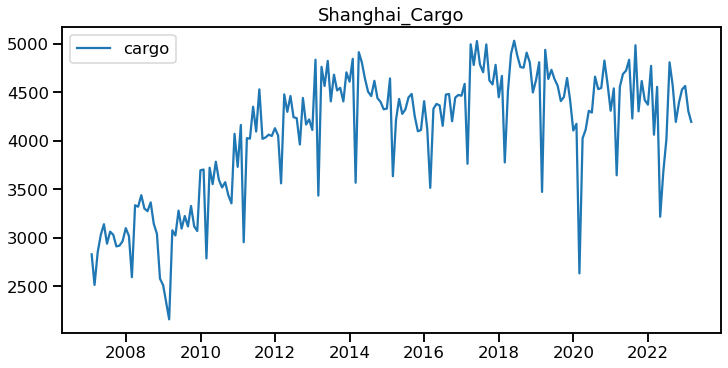

In [15]:
fig,ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(df.index, df['cargo'],label='cargo')
ax.legend()
ax.set_title('Shanghai_Cargo')

## Stationary
ADF test<br>
H0: Non stationary exists in the series<br>
H1: Stationary exists in the series

In [24]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df['cargo'])
print(f"Statistic: {res[0]}")
print(f"p-value: {res[1]}")
print(f"1%: {res[4][0]}")
print(f"5%: {res[4][1]}")
print(f"10%: {res[4][2]}")


Statistic: -2.198762722573004
p-value: 0.20669482363571368


KeyError: 0

In [30]:
res[4].values()

dict_values([-3.4672111510631, -2.877734766803841, -2.575403364197531])

## Seasonailty

### EDA: 월별 계절성을 확인

In [55]:
df.head()

,cargo,container
2007-01-31,2828.2,204.7
2007-02-28,2512.5,181.0
2007-03-31,2850.2,202.8
2007-04-30,3027.7,220.1
2007-05-31,3139.4,220.8


In [56]:
df_ = df.copy()
df_['month'] = df_.index.month

#### box_plot

<AxesSubplot:ylabel='cargo'>

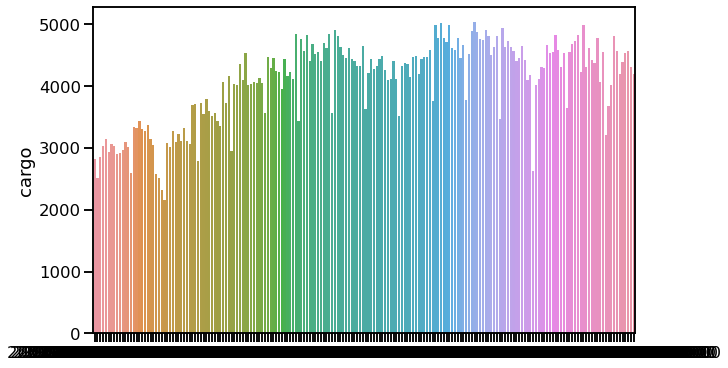

In [58]:
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.barplot(data=df_, x=df.index, y='cargo')

(2000.0, 5000.0)

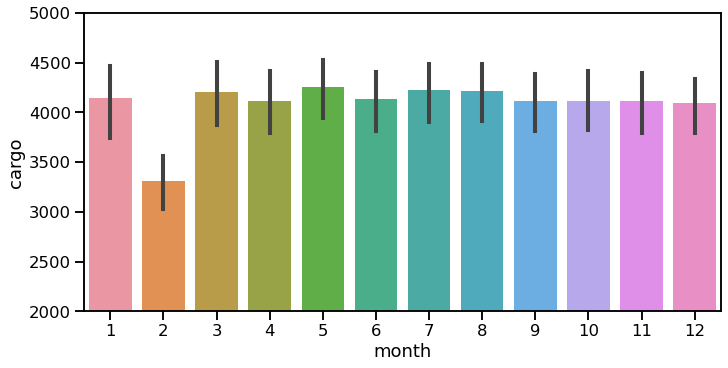

In [63]:
# 2월달에 하락 급격히 하락하는 모습을 보임
fig, ax = plt.subplots(figsize=(10,5),constrained_layout=True)
sns.barplot(data=df_, x='month', y='cargo',ax=ax)
ax.set_ylim([2000,5000])

#### line plot

In [89]:
df_.head()

,cargo,container,month
2007-01-31,2828.2,204.7,1
2007-02-28,2512.5,181.0,2
2007-03-31,2850.2,202.8,3
2007-04-30,3027.7,220.1,4
2007-05-31,3139.4,220.8,5


Text(0, 0.5, 'Cargo')

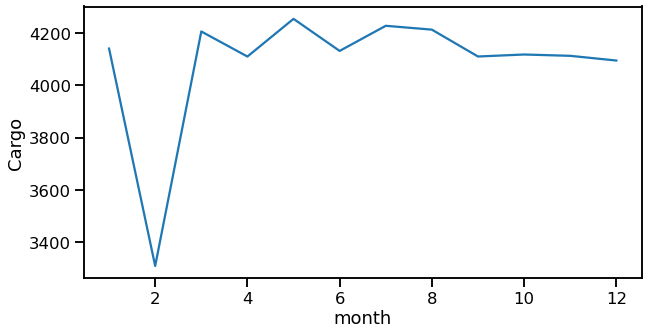

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))
df_.groupby("month")['cargo'].mean().plot(ax=ax)
plt.xlabel("month")
plt.ylabel("Cargo")

In [106]:
df_['year'] = df_.index.year
df_.head()

,cargo,container,month,date,year
2007-01-31,2828.2,204.7,1,2007-01-31,2007
2007-02-28,2512.5,181.0,2,2007-02-28,2007
2007-03-31,2850.2,202.8,3,2007-03-31,2007
2007-04-30,3027.7,220.1,4,2007-04-30,2007
2007-05-31,3139.4,220.8,5,2007-05-31,2007


In [107]:
df_.pivot(index=["month"],columns=["year"])['cargo']

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
month,,,,,,,,,,,,,,,,,
1,2828.2,3017.4,2324.2,3703.8,4163.2,4054.7,4836.4,4846.6,4643.6,4116.2,4587.9,4669.6,4810.7,4175.0,4540.8,4773.4,4304.7
2,2512.5,2592.2,2157.0,2786.0,2953.2,3560.8,3434.3,3567.0,3634.4,3514.6,3763.0,3776.6,3472.1,2631.9,3644.3,4062.6,4195.5
3,2850.2,3335.0,3076.2,3722.1,4027.6,4478.9,4763.2,4914.4,4219.1,4329.8,4995.9,4512.9,4938.6,4025.6,4556.2,4556.8,NaN
4,3027.7,3319.4,3022.6,3553.0,4021.9,4299.2,4565.7,4809.5,4432.0,4380.6,4782.6,4896.2,4637.8,4115.0,4688.2,3216.5,NaN
5,3139.4,3438.6,3279.3,3784.5,4351.8,4462.3,4824.5,4638.9,4277.8,4365.2,5029.5,5032.8,4732.4,4309.6,4724.7,3683.4,NaN
6,2938.4,3301.8,3093.6,3597.1,4095.5,4243.5,4406.7,4507.3,4322.6,4154.5,4787.2,4881.5,4637.3,4291.6,4836.1,4017.0,NaN
7,3062.2,3273.8,3223.6,3518.1,4530.9,4233.5,4682.6,4461.6,4447.1,4477.6,4707.4,4761.4,4567.8,4662.2,4230.3,4810.2,NaN
8,3029.0,3364.5,3115.8,3573.2,4020.5,3961.7,4519.9,4618.9,4484.0,4482.3,4994.7,4754.4,4409.9,4533.3,4985.8,4566.3,NaN
9,2909.9,3144.0,3327.5,3439.3,4034.4,4441.7,4546.4,4440.3,4254.0,4201.7,4624.2,4910.0,4452.3,4545.4,4303.8,4194.7,NaN


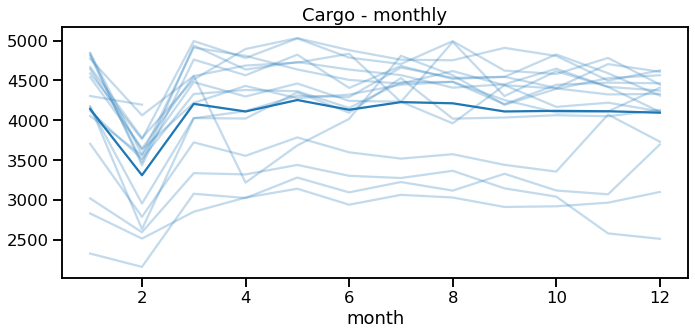

In [112]:
cmap = sns.color_palette("Blues", n_colors=5)

# 전체 데이터 월별 흐름 
fig, ax = plt.subplots(figsize=[10, 5])
(
    df_.pivot(index=["month"], columns=["year"])['cargo'].plot(
        legend=False, alpha=0.3, color=cmap[3], ax=ax
    )
)

# 평균선
(df_.groupby("month").mean(numeric_only=True)['cargo'].plot(ax=ax))

ax.set_title("Cargo - monthly")

plt.tight_layout()

### Detrend

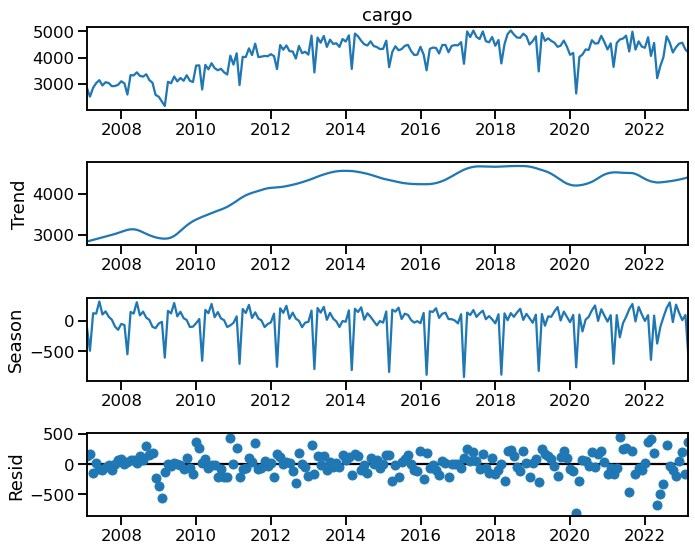

In [53]:
# Trend 가 존재하므로 Trend 제외 이후 분석
# STL 사용하여 추세제거
from statsmodels.tsa.seasonal import STL
stl = STL(df['cargo'],seasonal=13)
res = stl.fit()

plt.rc("figure", figsize=(10,8))
fig = res.plot()

### AutoCorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

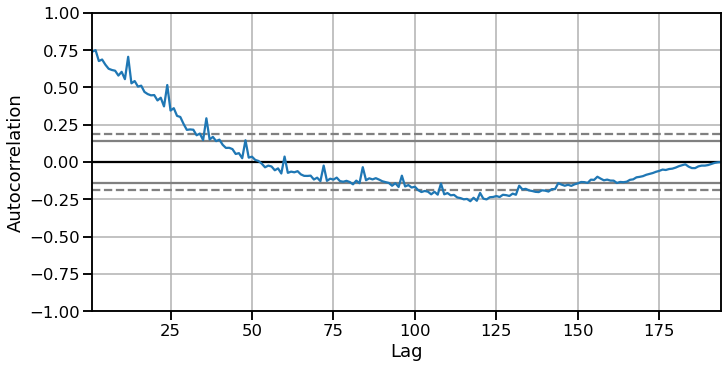

In [64]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
pd.plotting.autocorrelation_plot(df['cargo'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

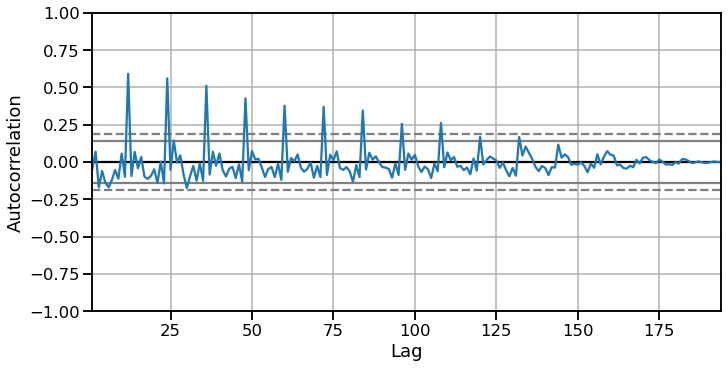

In [65]:
# detrend autocorrelation plot
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
detrend = res.seasonal + res.resid
pd.plotting.autocorrelation_plot(detrend)

(<matplotlib.patches.Rectangle at 0x1b0b238a1c0>,
 (<matplotlib.patches.ConnectionPatch at 0x1b0b1e5efd0>,
  <matplotlib.patches.ConnectionPatch at 0x1b0b1e6aa90>))

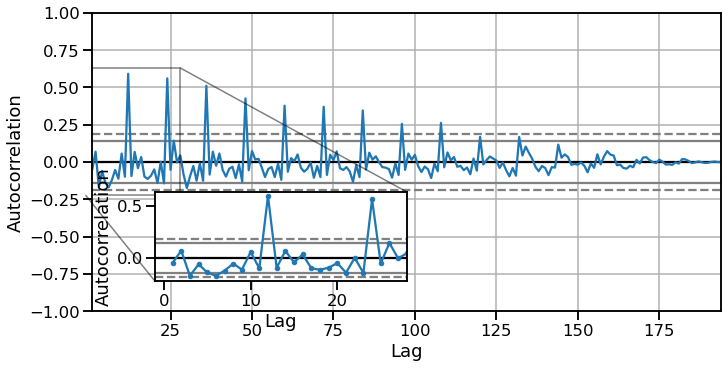

In [75]:
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
detrend = res.seasonal + res.resid
pd.plotting.autocorrelation_plot(detrend)
# 확대
ax_in = ax.inset_axes([0.1,0.1,0.4,0.3])
pd.plotting.autocorrelation_plot(detrend,ax=ax_in,marker='.')
ax_in.set_xlim(-1,28)
ax_in.grid(False)

# 확대부분
ax.indicate_inset_zoom(ax_in,edgecolor='k')

# Trend Feature: trend 변화 고려

Text(0.5, 1.0, 'Shanghai_Cargo')

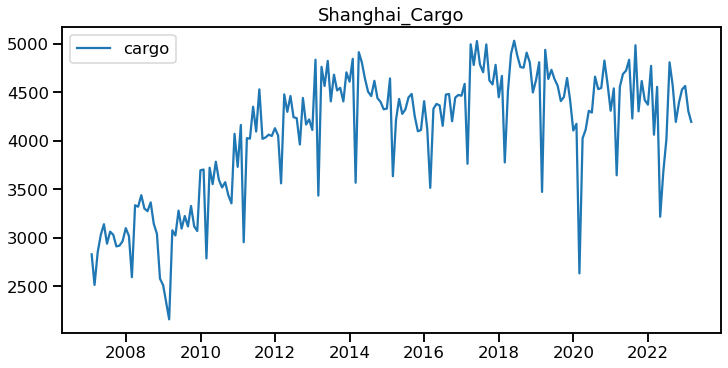

In [114]:
fig,ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(df.index, df['cargo'],label='cargo')
ax.legend()
ax.set_title('Shanghai_Cargo')

## Trend extraction

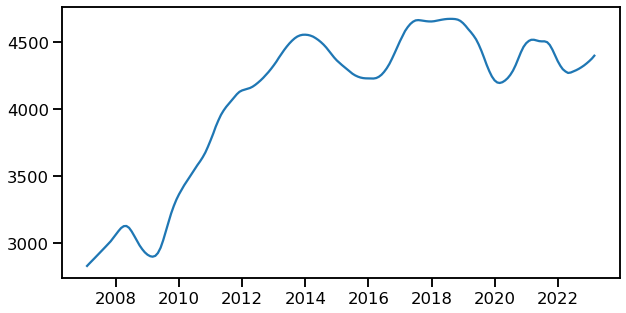

In [122]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(res.trend.index, res.trend)

## Trial1: Lowess 
세세한 트랜드 스무딩을 위해 lowess 사용<br>
trend 를 뽑아 local min, local max 를 사용하여 trend가 변하는 날짜를 찾을 예정<br>
뽑힌 trend에서 local min, local max가 정확하게 뽑아질 수 있는지 여부가 중요<br>

In [128]:
# frac = 0.1
from statsmodels.nonparametric.smoothers_lowess import lowess
y = df_['cargo']
x = np.arange(0,len(y))
frac = 0.1
res = lowess(
        endog=y,
        exog=x,
        frac = frac,
        it=3)
res[:10]

array([[0.00000000e+00, 2.82689409e+03],
       [1.00000000e+00, 2.84988887e+03],
       [2.00000000e+00, 2.87211222e+03],
       [3.00000000e+00, 2.89391937e+03],
       [4.00000000e+00, 2.91583561e+03],
       [5.00000000e+00, 2.93832898e+03],
       [6.00000000e+00, 2.96167461e+03],
       [7.00000000e+00, 2.98593247e+03],
       [8.00000000e+00, 3.01031617e+03],
       [9.00000000e+00, 3.03081244e+03]])

In [135]:
df_['lowess'] = res[:,1]
df_.head()

,cargo,container,month,date,year,lowess
2007-01-31,2828.2,204.7,1,2007-01-31,2007,2826.894094
2007-02-28,2512.5,181.0,2,2007-02-28,2007,2849.888875
2007-03-31,2850.2,202.8,3,2007-03-31,2007,2872.112220
2007-04-30,3027.7,220.1,4,2007-04-30,2007,2893.919374
2007-05-31,3139.4,220.8,5,2007-05-31,2007,2915.835608


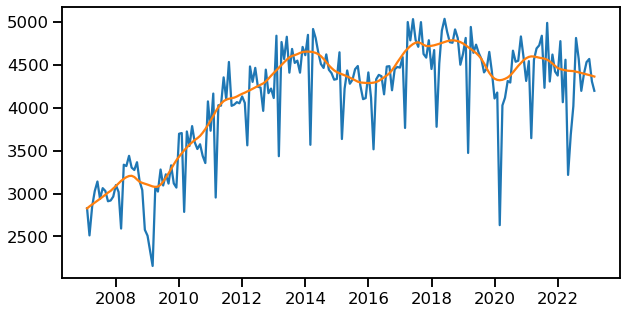

In [137]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_.index, df_['cargo'], label='cargo')
ax.plot(df_.index, df_['lowess'],label='lowess_trend')

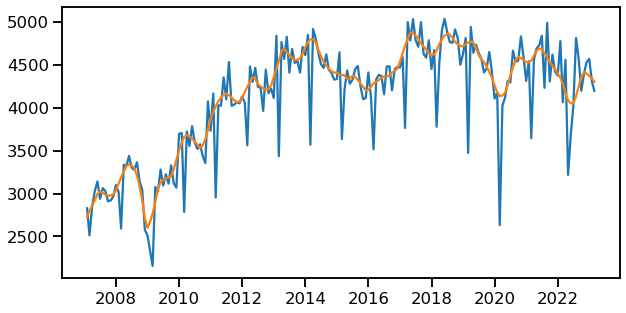

In [147]:
# frac 0.05 일때
frac = 0.05
res = lowess(
        endog=y,
        exog=x,
        frac = frac,
        it=3)
df_['lowess'] = res[:,1]

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_.index, df_['cargo'], label='cargo')
ax.plot(df_.index, df_['lowess'],label='lowess_trend')

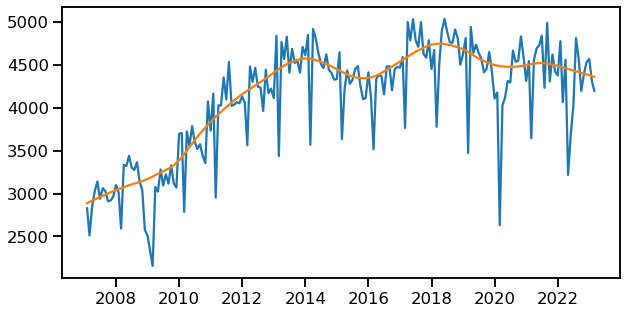

In [154]:
# frac 0.2 일때
frac = 0.2
res = lowess(
        endog=y,
        exog=x,
        frac = frac,
        it=3)
df_['lowess'] = res[:,1]

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_.index, df_['cargo'], label='cargo')
ax.plot(df_.index, df_['lowess'],label='lowess_trend')

In [166]:
from scipy.signal import argrelextrema
local_max_points = argrelextrema(np.array(df_['lowess']), np.greater)[0]
print(f"local_max points: {local_max_points}")

local_min_points = argrelextrema(np.array(df_['lowess']), np.less)[0]
print(f"local_min points: {local_min_points}")

local_max point: [ 83 134 172]
local_min points: [105 161]


In [175]:
change_points = np.concatenate([local_max_points,local_min_points])

Change points: 2013-12-31 00:00:00
Change points: 2018-03-31 00:00:00
Change points: 2021-05-31 00:00:00
Change points: 2015-10-31 00:00:00
Change points: 2020-06-30 00:00:00


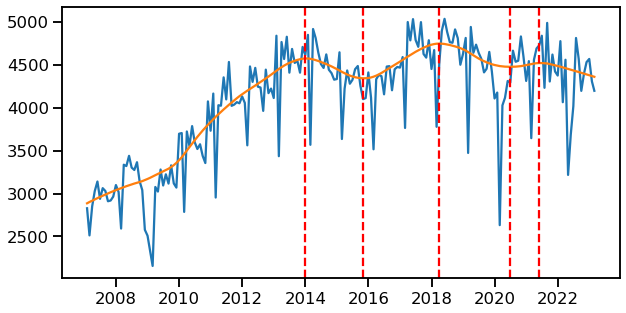

In [176]:
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(df_.index, df_['cargo'], label='cargo')
ax.plot(df_.index, df_['lowess'],label='lowess_trend')
 
for points in change_points:
    ax.axvline(x= df_.index[points], ls='--', color="r")
    c_date = df_.index[points]
    print(f"Change points: {c_date}")

## Change point detection 시도결과
* trend의 증가 감소는 잡을 수 있지만 같은 추세에서 기울기 변화는 잡을 수 없는 한계가 있음
* local min, local max가 잘 나오게 조절하려면 frac을 사람이 조절해줘야 하는 문제점이 있음
자동화 모델을 구축하기엔 한계가 있음

## Trial2: Tree model

In [ ]:
features = ["lowess"]
target = ["cargo"]

y_train = df_train[target]
X_train = df_train[features]

y_test = df_test[target]
X_test = df_test[features]

## Change points selection

In [117]:
(df_.index - df_.index[0])/np.timedelta64(1,"M")

Float64Index([               0.0, 0.9199367543481386, 1.9384381609478634,
               2.924084683463726,  3.942586090063451,  4.928232612579314,
               5.946734019179039,  6.965235425778763,  7.950881948294626,
               8.969383354894351,
              ...
              183.95449598554384, 184.94014250805972, 185.95864391465943,
              186.97714532125917, 187.96279184377502, 188.98129325037476,
               189.9669397728906, 190.98544117949035, 192.00394258609006,
               192.9238793404382],
             dtype='float64', length=194)

In [119]:
np.round((df_.index - df_.index[0])/np.timedelta64(1,"M"))

Float64Index([  0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,
                9.0,
              ...
              184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0,
              193.0],
             dtype='float64', length=194)

In [121]:
res.trend.index

DatetimeIndex(['2007-01-31', '2007-02-28', '2007-03-31', '2007-04-30',
               '2007-05-31', '2007-06-30', '2007-07-31', '2007-08-31',
               '2007-09-30', '2007-10-31',
               ...
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28'],
              dtype='datetime64[ns]', length=194, freq=None)

# Feature extraction